In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools


DATADIR = "C:/Users/20115/Desktop/newdataset/train"
validation="C:/Users/20115/Desktop/newdataset/validation"
CATEGORIES = ["Covid","normal","phenomina"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break

C:/Users/20115/Desktop/newdataset/train\Covid


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/20115/Desktop/newdataset/train\\Covid'

In [6]:
IMG_SIZE = 200

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

NameError: name 'img_array' is not defined

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 253/253 [00:02<00:00, 102.26it/s]

748


In [11]:
validation_data = []

def create_validation_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(validation,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                validation_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_validation_data()

print(len(validation_data))

100%|██████████| 77/77 [00:01<00:00, 72.71it/s]

218


In [6]:
import random

random.shuffle(training_data)
random.shuffle(validation_data)

NameError: name 'training_data' is not defined

In [65]:
X_train = []
y_train= []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)



X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train=np.array(y_train)

In [66]:
X_val = []
y_val= []

for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)



X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val =np.array(y_val)

In [67]:
import pickle

pickle_out = open("X2.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [29]:
import pickle

pickle_out = open("X3.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y3.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

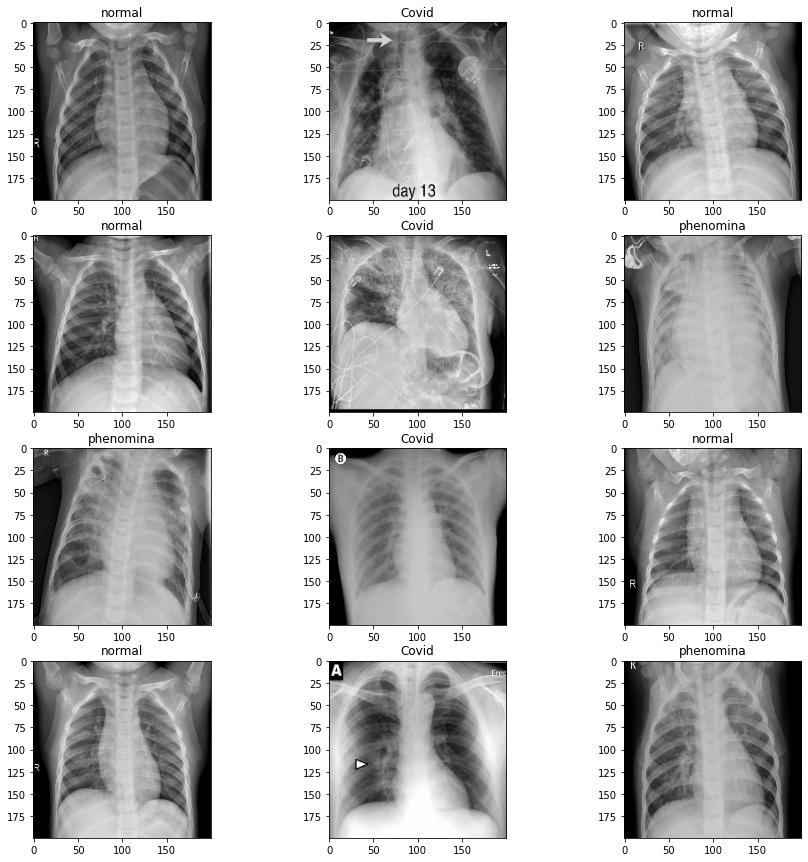

In [30]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X_val=X_val.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y_val[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X_val[i], cmap="gray")
    elif y_val[i] == 1 :
        ax.title.set_text('normal')
        plt.imshow(X_val[i], cmap="gray")
    else :
        ax.title.set_text('phenomina')
        plt.imshow(X_val[i], cmap="gray")
    
plt.show()

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/newdataset/train"
validation_data_dir = "C:/Users/20115/Desktop/newdataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 15
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')



print(model.summary())
model.save('CNN_Covid2.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/15
47/47 [==============================] - 20s 434ms/step - loss: 1.1791 - accuracy: 0.4613 - val_loss: 0.6268 - val_accuracy: 0.8229
Epoch 2/15
47/47 [==============================] - 23s 481ms/step - loss: 0.8179 - accuracy: 0.6635 - val_loss: 0.3919 - val_accuracy: 0.8125
Epoch 3/15
47/47 [==============================] - 30s 638ms/step - loss: 0.8470 - accuracy: 0.7313 - val_loss: 0.3575 - val_accuracy: 0.8281
Epoch 4/15
47/47 [==============================] - 27s 566ms/step - loss: 0.5078 - accuracy: 0.8046 - val_loss: 0.3950 - val_accuracy: 0.8073
Epoch 5/15
47/47 [==============================] - 25s 542ms/step - loss: 0.4692 - accuracy: 0.8182 - val_loss: 0.4910 - val_accuracy: 0.8385
Epoch 6/15
47/47 [==============================] - 25s 540ms/step - loss: 0.4534 - accuracy: 0.8331 - val_loss: 0.2475 - val_accuracy: 0.8958
Epoch 7/15
47/47 [==============================] - 25s 537m

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/newdataset/train"
validation_data_dir = "C:/Users/20115/Desktop/newdataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 15
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('sec.h5')



print(model.summary())
model.save('CNN_Covid4.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/15
47/47 [==============================] - 27s 583ms/step - loss: 1.0206 - accuracy: 0.4776 - val_loss: 0.4893 - val_accuracy: 0.7760
Epoch 2/15
47/47 [==============================] - 30s 629ms/step - loss: 0.7435 - accuracy: 0.7178 - val_loss: 0.3840 - val_accuracy: 0.8281
Epoch 3/15
47/47 [==============================] - 29s 621ms/step - loss: 0.5651 - accuracy: 0.7707 - val_loss: 0.5087 - val_accuracy: 0.7604
Epoch 4/15
47/47 [==============================] - 29s 616ms/step - loss: 0.5528 - accuracy: 0.8128 - val_loss: 0.2792 - val_accuracy: 0.8542
Epoch 5/15
47/47 [==============================] - 29s 616ms/step - loss: 0.4914 - accuracy: 0.8290 - val_loss: 0.2865 - val_accuracy: 0.8750
Epoch 6/15
47/47 [==============================] - 29s 614ms/step - loss: 0.3554 - accuracy: 0.8670 - val_loss: 0.2252 - val_accuracy: 0.9219
Epoch 7/15
47/47 [==============================] - 28s 606m

In [27]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

[[9.9991262e-01 1.5735976e-06 8.5881446e-05]]
Covid


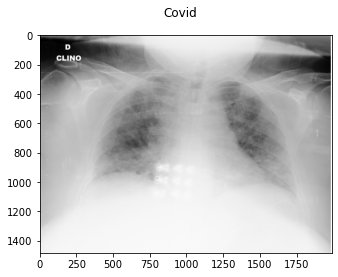

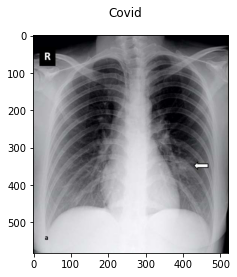

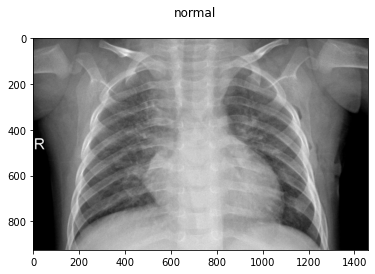

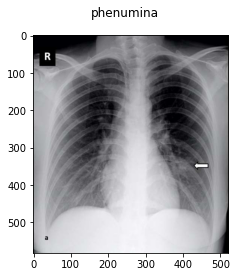

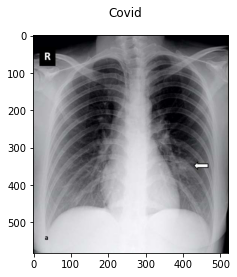

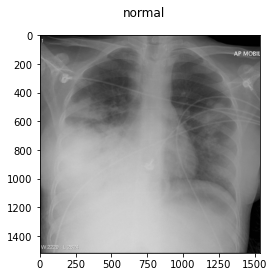

In [149]:
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
CATEGORIES = ["Covid", "normal","phenumina"]


def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)/255.0


model = tf.keras.models.load_model("choosen2.model")

prediction1 = model.predict([prepare('C:/Users/20115/h1.jpeg')])
prediction2 = model.predict([prepare('C:/Users/20115/xray.png')])
prediction3 = model.predict([prepare('C:/Users/20115/norm.jpeg')])
prediction4 = model.predict([prepare('C:/Users/20115/person16_bacteria_54.jpeg')])
prediction5 = model.predict([prepare('C:/Users/20115/sick1.png')])
prediction6 = model.predict([prepare('C:/Users/20115/normal1.jpeg')])

test1 =CATEGORIES[int(prediction1[0][0])]
test2 =CATEGORIES[int(prediction2[0][0])]
test3 =CATEGORIES[int(prediction3[0][0])]
test4 =CATEGORIES[int(prediction4[0][0])]
test5 =CATEGORIES[int(prediction5[0][0])]
test6 =CATEGORIES[int(prediction6[0][0])]
print(prediction1)
pred_name1 = CATEGORIES[np.argmax(prediction1)]
pred_name2 = CATEGORIES[np.argmax(prediction2)]
pred_name3 = CATEGORIES[np.argmax(prediction3)]
pred_name4 = CATEGORIES[np.argmax(prediction4)]
pred_name5 = CATEGORIES[np.argmax(prediction5)]
pred_name6 = CATEGORIES[np.argmax(prediction6)]
print(pred_name1)
fig, ax = plt.subplots()
fig.suptitle(pred_name1, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/h1.jpeg')
plt.imshow(np_img ,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name2, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/xray.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name3, fontsize=12)
np_img = mpimg.imread('person16_bacteria_54.jpeg')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name4, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/hamada.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name5, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick1.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name6, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick2.jpg')
plt.imshow(np_img)

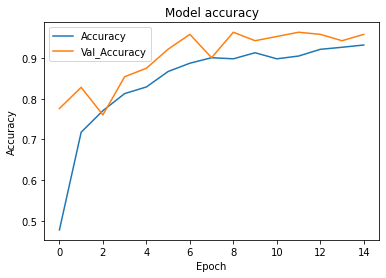

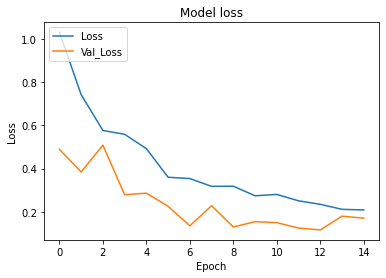

In [214]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [3]:
TEST_DIR ="C:/Users/20115/Desktop/newdataset/test/"
test_data = []
CATEGORIES = ["Covid", "normal","phenumina"]
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))
print(test_data)

NameError: name 'tqdm' is not defined

In [2]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)



X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test =np.array(y_test)
print(y_test)

NameError: name 'test_data' is not defined

In [1]:

from tensorflow.keras.models import load_model
import random

from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
import cv2
import os
images = []
actual=[]
CATEGORIES = ["Covid", "normal","phenomina"]
model = tf.keras.models.load_model("CNN_Covid2.model")
TEST_DIR ="C:/Users/20115/Desktop/newdataset/validation/"
for category in CATEGORIES:  # do dogs and cats
     path = os.path.join(TEST_DIR,category)
     class_num = CATEGORIES.index(category) 
     for img in os.listdir(path):
         # create path to dogs and cats
        IMG_SIZE = 150  # 50 in txt-based
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array=new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
        actual.append([new_array, class_num])
        images.append(new_array/255.)
        
        # stack up images list to pass for prediction
images = np.vstack(images)

X_train=[]
y_train=[]

for f,l in actual:
    X_train.append(f)
    y_train.append(l)


X_train = np.array(X_train).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_train =np.array(y_train)


X_train=X_train/255.0

X_Test2=X_test.squeeze()





NameError: name 'tf' is not defined

In [30]:
import random

random.shuffle(test_data)

NameError: name 'test_data' is not defined

201
4


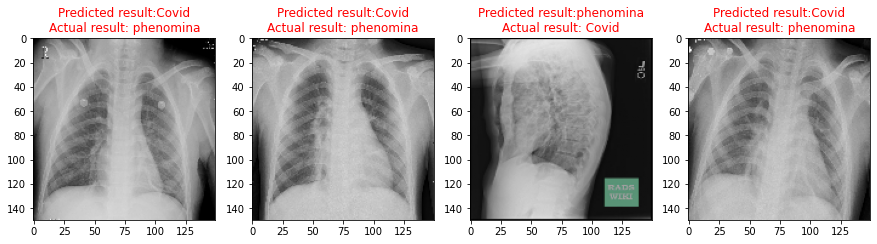

In [212]:
i=0
prop_class=[]
mis_class=[]
classes = model.predict(images)

print(len(y_test))
for i in range(len(y_test)):
    if(np.argmax(classes[i]))==y_test[i]:
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if([np.argmax(classes[i])])!=y_test[i]:
        mis_class.append(i)
print(len(mis_class))
random.shuffle(prop_class)
random.shuffle(mis_class)
# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6

    
for i in range(len(mis_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[i]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax.Color = 'red';
    ax.imshow(X_Test2[mis_class[i]], cmap="gray")
    

C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


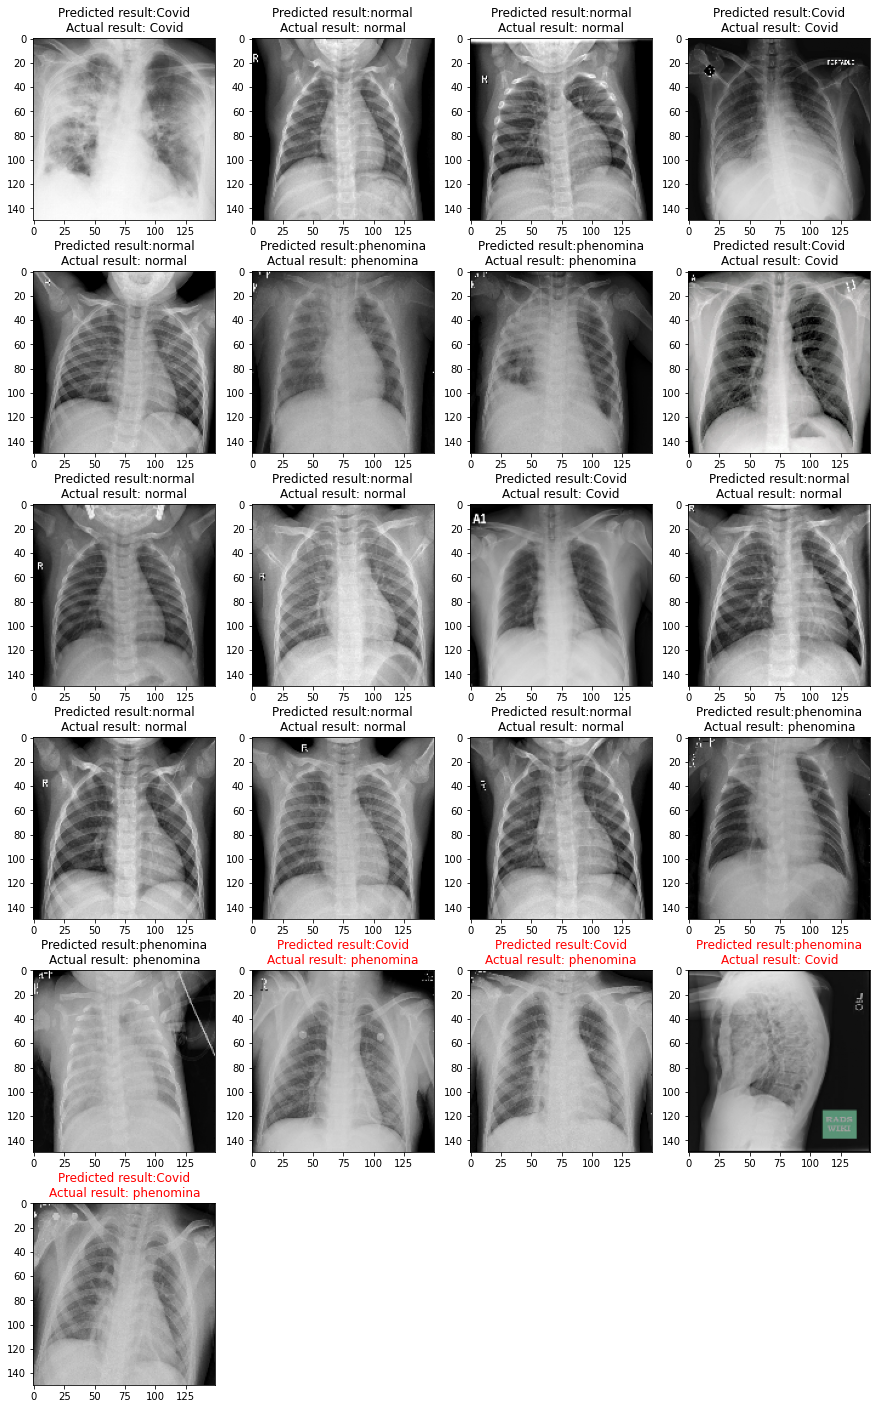

In [213]:
  w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6 
for i in range(0,19):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[prop_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[prop_class[i]]] )
    ax.Color = 'red';
    ax.imshow(X_Test2[prop_class[i]], cmap="gray")
    
for y in range(4):
    ax1 = fig.add_subplot(rows, columns, y+i)
    ax1.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[y]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[y]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax1.Color = 'red';
    ax1.imshow(X_Test2[mis_class[y]], cmap="gray")
plt.show()


Confusion matrix, without normalization
[[63  1  3]
 [ 0 65  0]
 [ 4  1 64]]
Classification Report
0.9552238805970149
              precision    recall  f1-score   support

       Covid       0.94      0.94      0.94        67
      normal       1.00      0.97      0.98        67
   phenomina       0.93      0.96      0.94        67

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201



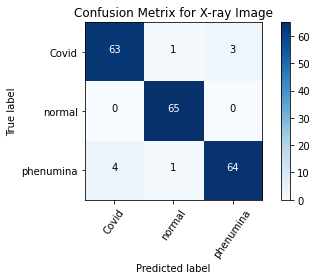

In [206]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(classes, axis=1), y_test)

cm_plot_label =['Covid', 'normal',"phenumina"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(np.argmax(classes, axis=1), y_test)
print(accuracy_score(np.argmax(classes, axis=1), y_test))
target_names = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = classification_report(target_names, np.argmax(classes, axis=1), target_names=class_labels)
print(report) 

In [207]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
CATEGORIES = ["Covid", "normal","phenomina"]
y_prob = model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))




One-vs-One ROC AUC scores:
0.991943 (macro),
0.991943 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.991943 (macro),
0.991943 (weighted by prevalence)


In [2]:


model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=100, verbose=1)


NameError: name 'model' is not defined

In [1]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_prob = model.predict_proba(X_test)
y_true = y_test

skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()

NameError: name 'model' is not defined

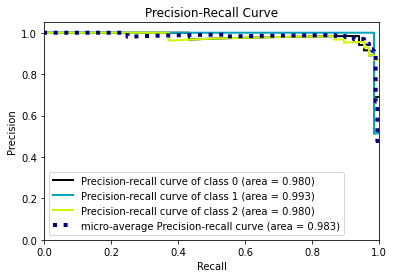

In [209]:
skplt.metrics.plot_precision_recall(y_test, y_prob)

plt.show()